# PS3 Discussion: Quantifying Uncertainty with Standard Errors and p-values

Let's explore standard deviation (SD) and standard error (SE) by the example of a die and a coin. 

In [1]:
# creating the sides of a die
dice <- c(1:6)

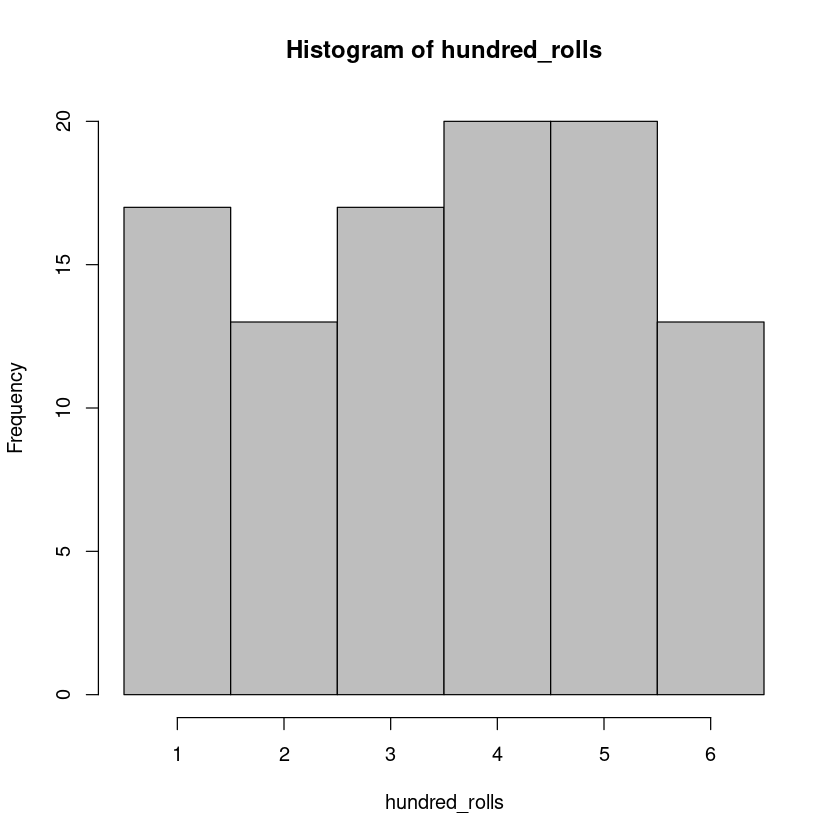

In [9]:
# Let's see the distribution of sides if we roll a die 100 times
hundred_rolls <- sample(dice, 100, replace = TRUE) # What is the sample size here?
hist(hundred_rolls, col = "gray", breaks = c(0.5:6.5))

# Does this look like what you expect? Why? 

In [10]:
# What's the standard deviation of our 100 rolls? What function should we use?
sd(hundred_rolls)

# What's the mean of 100 rolls? What function should we use?
mean(hundred_rolls)

[1] 1.654379

[1] 3.52

## Quick Check 1

What is the standard error of the `hundred_rolls` sample above?

Recall: standard error is `standard deviation of the sample / square root of the sample size`

In [11]:
standard_error <- sd(hundred_rolls)/sqrt(100)
standard_error

[1] 0.1654379

In [12]:
# Let's do simulations: take 100 rolls for 1000 times, and calculate the mean for each 100 rolls
# Just run the codes below

sample_means <- array()

for(i in c(1:1000)){
    new_hundred_rolls <- sample(dice, 100, replace = TRUE)
    sample_means[i] <- mean(new_hundred_rolls)
}

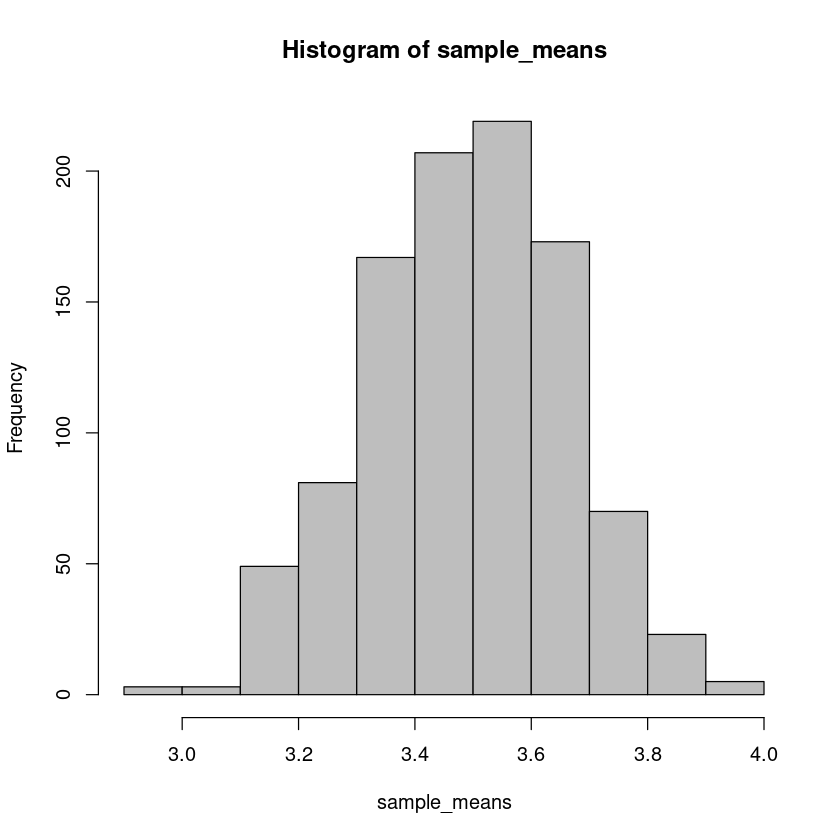

In [13]:
# Distribution of sample means
hist(sample_means, col = "gray")

# What's different about this graph versus the first?

In [14]:
# SE = SD of the sample mean
sd(sample_means) 

# Compare to your mathematical calculation from earlier:
standard_error

# Notice the similarity! But why are they different?

[1] 0.1690372

[1] 0.1654379

## Let's think about p-values

Imagine we have a coin. We flip it 10 times, and get 9 heads out of 10 flips. That's weird, because we thought the coin is fair (i.e., 50% of the flips should be heads).

We want to know: is the coin fair or biased towards heads? 

## Quick Check 2:

Null: "The coin is fair and the probability of getting heads or tails is the same. Therefore, if I flipped a coin 10 times, 5 of the flips should be heads, on average." 

What is a reasonable alternative hypothesis? 
The alternative hypothesis will assume the coin is unfair.

In [15]:
# Flip a fair coin; set 1 to be heads, 0 to be tails
coin <- c(0, 1)

In [16]:
# Flip this coin 10 times, 1000 times. Assuming the coin is fair
# Let's find the number of heads. Just run the codes below

num_heads <- array()

for(i in c(1:1000)){
    heads <- sample(coin, 10, replace = TRUE)
    num_heads[i] <- sum(heads) 
}

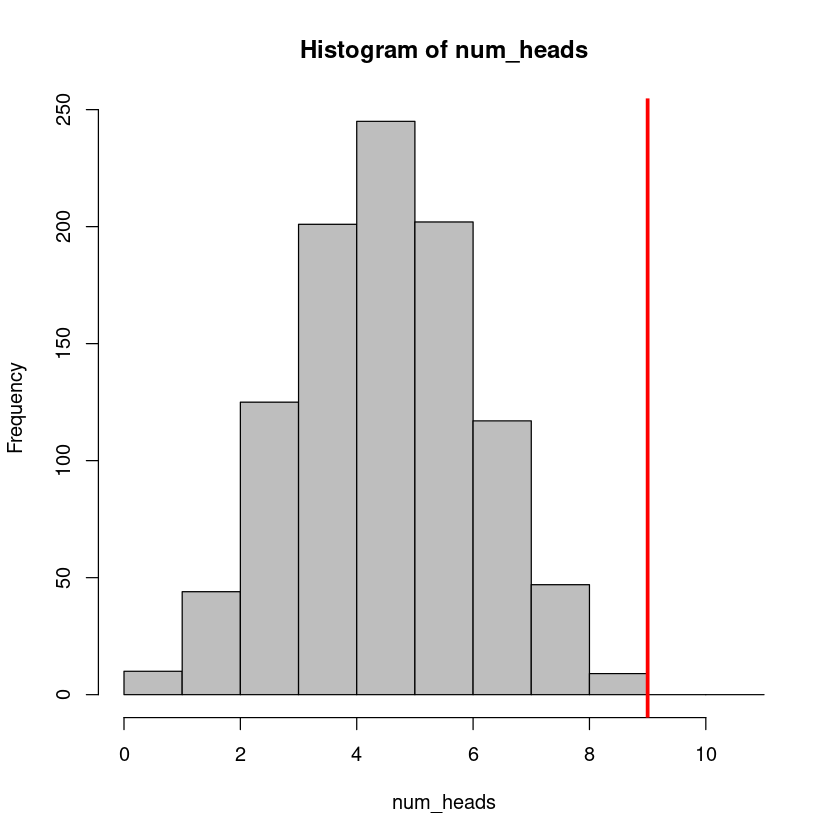

In [17]:
hist(num_heads, breaks = c(0:11), col = "gray")
abline(v = 9, col = "red", lwd = 3)

**What does the histogram tell us about the hypotheses?**
It tells us that we are likely to have a very small p-value and a significant result.

You can confirm your thoughts by calculating the p-value. 

*Hint:* `num_heads` is a list of numbers of the potential outcomes of flipping a coin, assuming the coin was fair. More extreme, in this case, means greater than the observed value. 

In [18]:
sum(num_heads >= 9) / 1000

[1] 0.009

**Let's interpret the data:**

(1) What does the p-value mean in context?
The probability of seeing an estimate as large or larger than the estimate we saw, if the null hypothesis were true.

(2) What does it tell us about the coin? Is it fair or unfair? 
Since .009<.05, we reject the null hypothesis, and we conclude that the coin is unfair at at 5 significance level.

This process of using p-values (and by association, t-scores/standard error) lets us account for the uncertainty caused by random chance (e.g. if we repeated the experiment many times, what are the various potential outcomes that could happen?). 

In practice, when we work with real data, we'll use the `difference_in_means` function to calculate the effect, t-score, standard error, and p-value. This exercise was simply to show the statistical intuition behind these processes!